# Importing Libraries

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [32]:
df_travel = pd.read_csv(r'C:\Users\makay\Documents\Data Immersion 6\6.1 assignment.csv',index_col = False)

In [33]:
df_travel.dtypes

Trip ID                   int64
Destination              object
Start date               object
End date                 object
Duration (days)           int64
Traveler name            object
Traveler age              int64
Traveler gender          object
Traveler nationality     object
Accommodation type       object
Accommodation cost        int64
Transportation type      object
Transportation cost     float64
dtype: object

In [38]:
# Create a subset for only columns wanted for correlation

sub = df_travel[['Duration (days)','Traveler age','Accommodation cost','Transportation cost']]

In [40]:
# Creating correlation matrix
sub.corr()

,Duration (days),Traveler age,Accommodation cost,Transportation cost
Duration (days),1.000000,-0.120520,-0.127126,-0.001185
Traveler age,-0.120520,1.000000,0.032169,0.054533
Accommodation cost,-0.127126,0.032169,1.000000,0.787319
Transportation cost,-0.001185,0.054533,0.787319,1.000000


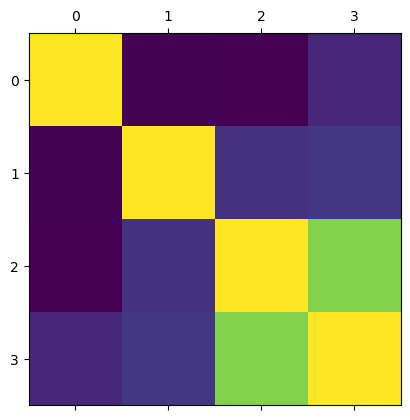

In [53]:
# Create a correlation heatmap using matplotlib

plt.matshow(sub.corr())
plt.show()

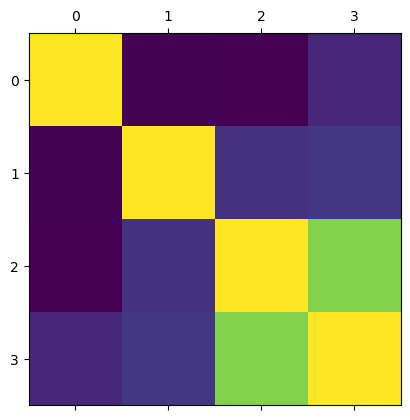

In [54]:
# Save figure
plt.matshow(sub.corr())
plt.savefig("out.png")

Text(0.5, 1.0, 'Correlation Matrix')

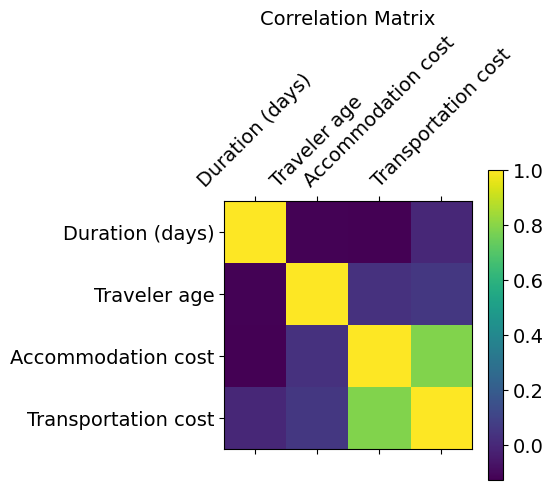

In [55]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(4, 4)) # figure size 
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

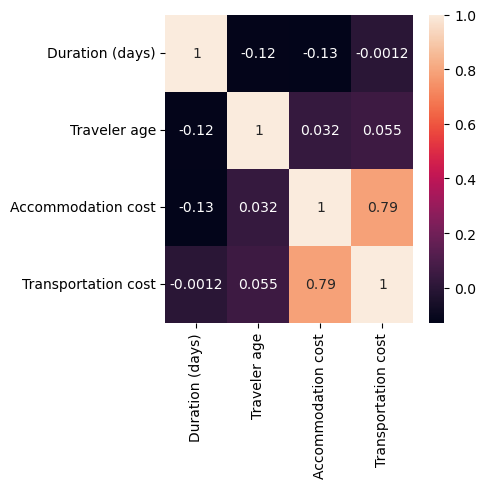

In [56]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(4,4))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

Duration seems to have the weakest correlation with transportation cost looking like it is the strongest

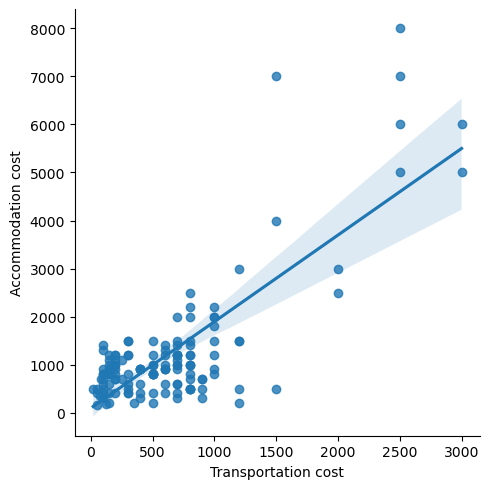

In [60]:
# Create a scatterplot for the "Duration (days)" and "Accommodation cost" columns in seaborn

sns.lmplot(x = 'Transportation cost', y = 'Accommodation cost', data = df_travel)

There is a postive upward trend with data points because less and less as the cost of transportation and accommodation go up. This shows that people overall still want to pay less for theses costs with a few outliers in the more expensive price range.

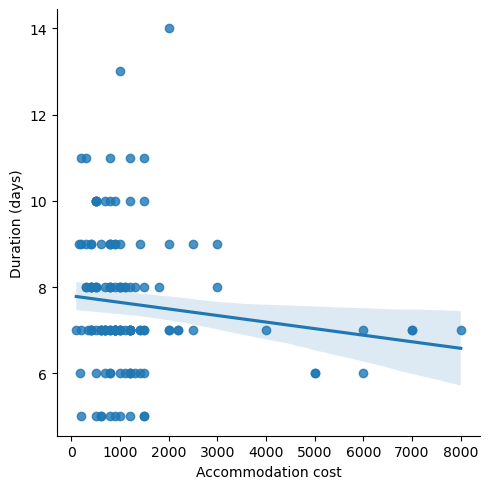

In [69]:
sns.lmplot(y = 'Duration (days)', x = 'Accommodation cost', data = df_travel)

These 2 variables produced a downward trend. It seems like more people were willing to have longer trips if the price of where they were staying was lower. But we can see that as the price increases the duration of stays decreases. 

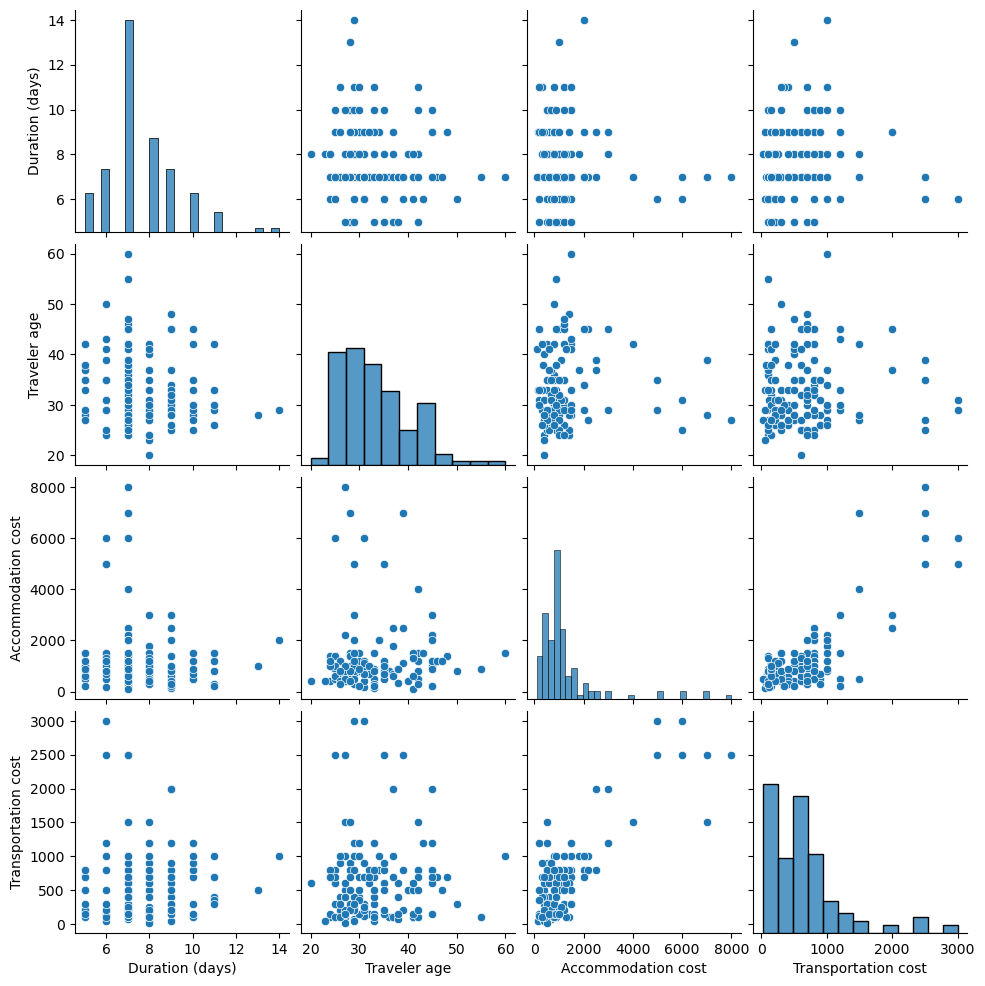

In [70]:
# Create a pair plot 

g = sns.pairplot(sub)

duration and travelers age seems to have an interesting relationship where it looks like there is a peak age that could correspond with how long that person travels and it trails off 

I would also like to look deeper into accommodation cost affecting duration and seeing why it is affecting duration so much.

<AxesSubplot:xlabel='Traveler age', ylabel='Count'>

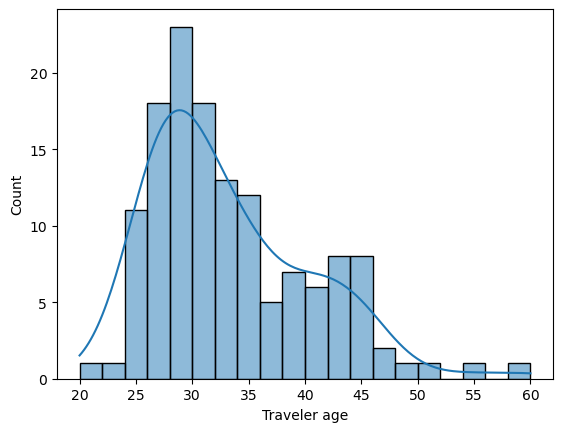

In [71]:
# Making categorical plot for Traveler age category
# using a histogram to see ages to be able to make correct sized categories 
sns.histplot(df_travel['Traveler age'], bins = 20, kde = True)

Categories: 
young: 20-35, 
middle age: 36-50, 
senior: 51 and older

In [76]:
 df_travel.loc[df_travel['Traveler age'] <= 35, 'Age category'] = 'Young Adult'

In [79]:
df_travel.loc[(df_travel['Traveler age'] <= 50) & (df_travel['Traveler age'] > 36), 'Age category'] = 'Middle Age Adult'

In [80]:
 df_travel.loc[df_travel['Traveler age'] >= 51, 'Age category'] = 'Senior Adult'

In [81]:
df_travel['Age category'].value_counts(dropna = False)

Young Adult         97
Middle Age Adult    37
Senior Adult         2
NaN                  1
Name: Age category, dtype: int64

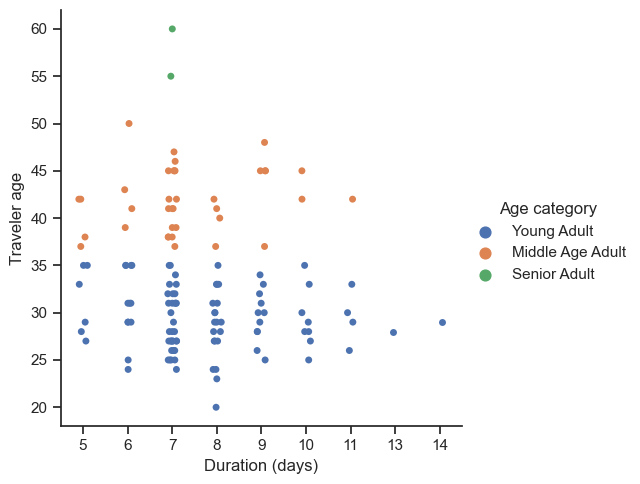

In [84]:
# Create a categorical plot in seaborn using the Age categories created above

sns.set(style="ticks")
g = sns.catplot(x="Duration (days)", y="Traveler age", hue="Age category", data=df_travel)

In [83]:
#Saving figure
g.savefig("out.png") 


#Answering any questions from first task, only 1 was able to be answered from results so far                     

•Is there an age when people tend to travel more or less?
Yes, per the results found so far it seems that young adults age 20-35 are more likely to travel and also stay longer on their trips 

#Additional questions added to analysis

•	Does the cost of accommodations play a factor in the duration that someone takes for their trip?
It seems like more people were willing to have longer trips if the price of where they were staying was lower. But we can see that as the price increases the duration of stays decreases

#Hypothesis

If a traveler is between the ages of 20 to 35 they are more likely to travel and stay longer on their trip then someone 51 and older

If the cost of where the traveler is staying is low then travelers will be more likely to stay longer for their trip

